In [45]:
#import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm

In [46]:
import folium
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df = df[df['species_name'] == "Rusa alfredi (Visayan Spotted Deer)"]
df=df[['date_report','no_observation']]
df.head()

,date_report,no_observation
6,2016-01-18,21
11,2016-02-15,19
14,2016-02-15,21
19,2016-03-14,20
22,2016-03-14,14


In [47]:

df['date_report']=pd.to_datetime(df['date_report'])

In [48]:
df.columns

Index(['date_report', 'no_observation'], dtype='object')

In [49]:
df


,date_report,no_observation
6,2016-01-18,21
11,2016-02-15,19
14,2016-02-15,21
19,2016-03-14,20
22,2016-03-14,14
...,...,...
540,2021-10-14,15
543,2021-11-17,29
546,2021-11-18,20
549,2021-12-15,28


In [50]:
### Rename the columns
new_df = df.reset_index().rename(columns={'date_report':'date', 'no_observation' : 'Popu'})

### Remove the header row
new_df = new_df.iloc[1:len(new_df)]

new_df

,index,date,Popu
1,11,2016-02-15,19
2,14,2016-02-15,21
3,19,2016-03-14,20
4,22,2016-03-14,14
5,27,2016-04-11,20
...,...,...,...
139,540,2021-10-14,15
140,543,2021-11-17,29
141,546,2021-11-18,20
142,549,2021-12-15,28


In [51]:
new_df['year']=new_df.date.dt.year
new_df['month']=new_df.date.dt.month
new_df['day']=new_df.date.dt.day

In [52]:
new_df

,index,date,Popu,year,month,day
1,11,2016-02-15,19,2016,2,15
2,14,2016-02-15,21,2016,2,15
3,19,2016-03-14,20,2016,3,14
4,22,2016-03-14,14,2016,3,14
5,27,2016-04-11,20,2016,4,11
...,...,...,...,...,...,...
139,540,2021-10-14,15,2021,10,14
140,543,2021-11-17,29,2021,11,17
141,546,2021-11-18,20,2021,11,18
142,549,2021-12-15,28,2021,12,15


In [53]:
new_df.index = new_df.date
new_df

,index,date,Popu,year,month,day
date,,,,,,
2016-02-15,11,2016-02-15,19,2016,2,15
2016-02-15,14,2016-02-15,21,2016,2,15
2016-03-14,19,2016-03-14,20,2016,3,14
2016-03-14,22,2016-03-14,14,2016,3,14
2016-04-11,27,2016-04-11,20,2016,4,11
...,...,...,...,...,...,...
2021-10-14,540,2021-10-14,15,2021,10,14
2021-11-17,543,2021-11-17,29,2021,11,17
2021-11-18,546,2021-11-18,20,2021,11,18


<AxesSubplot:xlabel='month'>

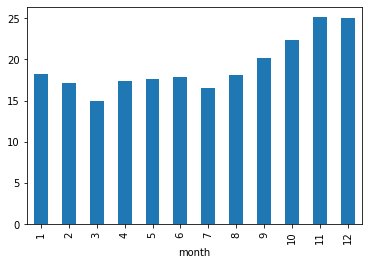

In [54]:
new_df.groupby('month').Popu.mean().plot.bar()

<AxesSubplot:xlabel='year'>

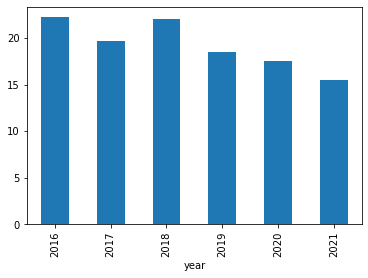

In [55]:
new_df.groupby('year').Popu.mean().plot.bar()

In [56]:
new_df

,index,date,Popu,year,month,day
date,,,,,,
2016-02-15,11,2016-02-15,19,2016,2,15
2016-02-15,14,2016-02-15,21,2016,2,15
2016-03-14,19,2016-03-14,20,2016,3,14
2016-03-14,22,2016-03-14,14,2016,3,14
2016-04-11,27,2016-04-11,20,2016,4,11
...,...,...,...,...,...,...
2021-10-14,540,2021-10-14,15,2021,10,14
2021-11-17,543,2021-11-17,29,2021,11,17
2021-11-18,546,2021-11-18,20,2021,11,18


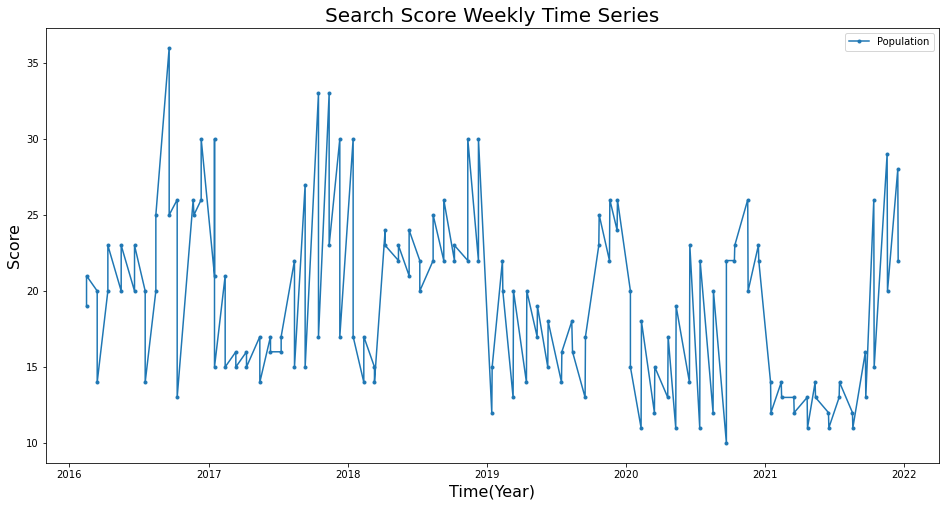

In [57]:
plt.figure(figsize=(16,8))

plt.plot(new_df['Popu'], ".-", label = 'Population')

plt.title('Search Score Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

In [58]:
monthly = new_df.resample('M').sum()
monthly

,index,Popu,year,month,day
date,,,,,
2016-02-29,25,40,4032,4,30
2016-03-31,41,34,4032,6,28
2016-04-30,57,43,4032,8,22
2016-05-31,73,43,4032,10,32
2016-06-30,89,43,4032,12,40
...,...,...,...,...,...
2021-08-31,1051,23,4042,16,37
2021-09-30,1064,29,4042,18,43
2021-10-31,1077,41,4042,20,27


In [59]:
start_date = datetime(2016,1,1)
end_date = datetime(2021,11,30)

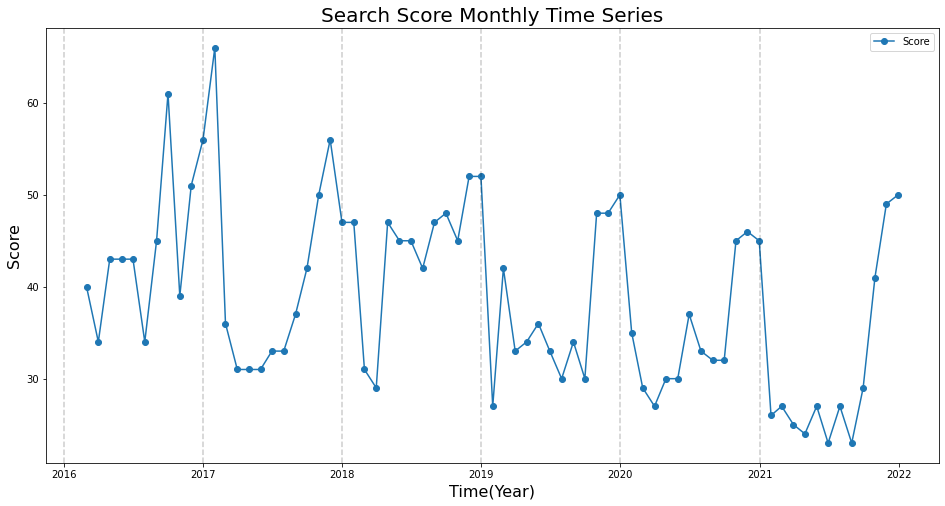

In [60]:
plt.figure(figsize=(16,8))

plt.plot(monthly['Popu'], "o-", label = 'Score')

plt.title('Search Score Monthly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [61]:
start_date = datetime(2016,1,1)
end_date = datetime(2021,11,30)

lim_data = monthly[start_date:end_date]
len(lim_data)

70

In [62]:
lim_data

,index,Popu,year,month,day
date,,,,,
2016-02-29,25,40,4032,4,30
2016-03-31,41,34,4032,6,28
2016-04-30,57,43,4032,8,22
2016-05-31,73,43,4032,10,32
2016-06-30,89,43,4032,12,40
...,...,...,...,...,...
2021-07-31,1039,27,4042,14,29
2021-08-31,1051,23,4042,16,37
2021-09-30,1064,29,4042,18,43


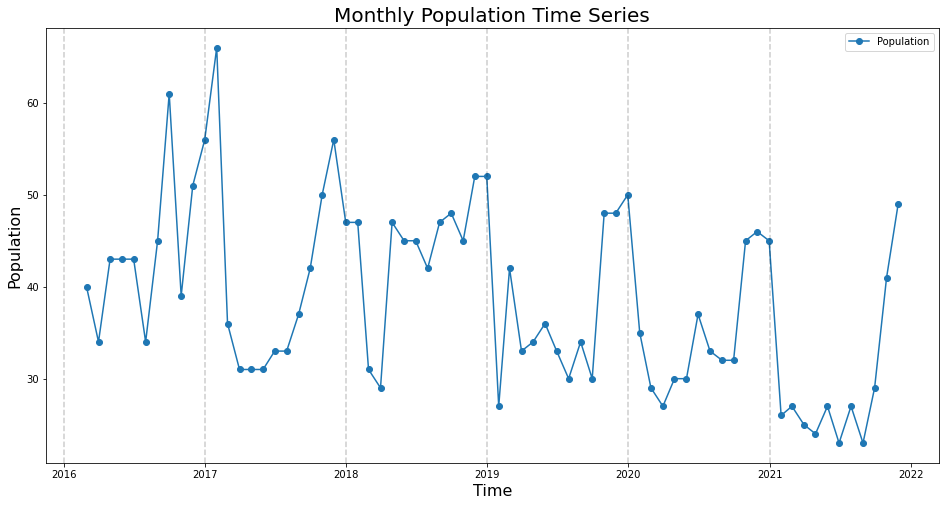

In [63]:
plt.figure(figsize=(16,8))

plt.plot(lim_data['Popu'], "o-", label = 'Population')

plt.title('Monthly Population Time Series', fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Population", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [64]:
# DF Test using statsmodels adfuller
from statsmodels.tsa.stattools import adfuller

def df_test(time_series):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print (dfoutput)

In [65]:
df_test(lim_data.Popu)

Results of Dickey-Fuller Test:
Test Statistic                 -1.108240
p-value                         0.711775
#Lags Used                     11.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [66]:
print(list(lim_data.Popu))

[40, 34, 43, 43, 43, 34, 45, 61, 39, 51, 56, 66, 36, 31, 31, 31, 33, 33, 37, 42, 50, 56, 47, 47, 31, 29, 47, 45, 45, 42, 47, 48, 45, 52, 52, 27, 42, 33, 34, 36, 33, 30, 34, 30, 48, 48, 50, 35, 29, 27, 30, 30, 37, 33, 32, 32, 45, 46, 45, 26, 27, 25, 24, 27, 23, 27, 23, 29, 41, 49]


In [67]:
first_diff = lim_data.Popu.diff()[1:]

print(list(first_diff))

[-6.0, 9.0, 0.0, 0.0, -9.0, 11.0, 16.0, -22.0, 12.0, 5.0, 10.0, -30.0, -5.0, 0.0, 0.0, 2.0, 0.0, 4.0, 5.0, 8.0, 6.0, -9.0, 0.0, -16.0, -2.0, 18.0, -2.0, 0.0, -3.0, 5.0, 1.0, -3.0, 7.0, 0.0, -25.0, 15.0, -9.0, 1.0, 2.0, -3.0, -3.0, 4.0, -4.0, 18.0, 0.0, 2.0, -15.0, -6.0, -2.0, 3.0, 0.0, 7.0, -4.0, -1.0, 0.0, 13.0, 1.0, -1.0, -19.0, 1.0, -2.0, -1.0, 3.0, -4.0, 4.0, -4.0, 6.0, 12.0, 8.0]


No handles with labels found to put in legend.


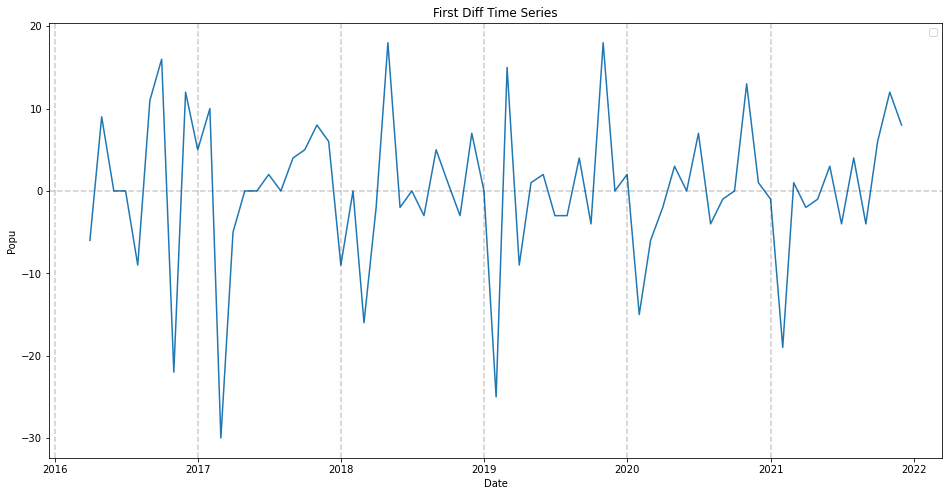

In [68]:
plt.figure(figsize=(16,8))

plt.plot(first_diff)

plt.title('First Diff Time Series')
plt.xlabel("Date")
plt.ylabel("Popu")
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [69]:
df_test(first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.608237e+00
p-value                        6.474762e-09
#Lags Used                     1.000000e+01
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


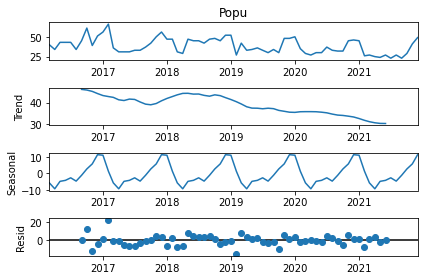

In [70]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(lim_data.Popu).plot()
plt.show()

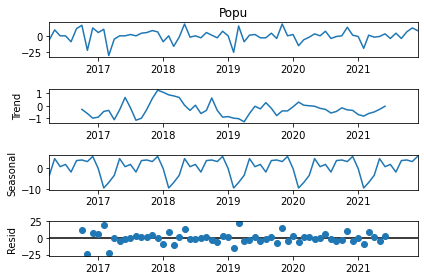

In [71]:
sm.tsa.seasonal_decompose(first_diff).plot()
plt.show()

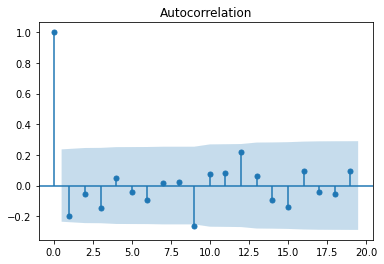

In [72]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(first_diff)

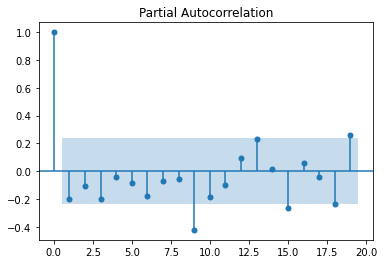

In [73]:
pacf_plot = plot_pacf(first_diff)

In [74]:
lim_data

,index,Popu,year,month,day
date,,,,,
2016-02-29,25,40,4032,4,30
2016-03-31,41,34,4032,6,28
2016-04-30,57,43,4032,8,22
2016-05-31,73,43,4032,10,32
2016-06-30,89,43,4032,12,40
...,...,...,...,...,...
2021-07-31,1039,27,4042,14,29
2021-08-31,1051,23,4042,16,37
2021-09-30,1064,29,4042,18,43


In [75]:
from datetime import timedelta

train_end = datetime(2020,12,31)
test_end = datetime(2021,11,30)

train_data = lim_data[:train_end]
test_data = lim_data[train_end + timedelta(days=1):test_end]

In [76]:
train_data.tail(5)

,index,Popu,year,month,day
date,,,,,
2020-08-31,891,32,4040,16,35
2020-09-30,907,32,4040,18,42
2020-10-31,923,45,4040,20,25
2020-11-30,939,46,4040,22,33
2020-12-31,955,45,4040,24,29


In [77]:
test_data

,index,Popu,year,month,day
date,,,,,
2021-01-31,967,26,4042,2,31
2021-02-28,979,27,4042,4,25
2021-03-31,991,25,4042,6,35
2021-04-30,1003,24,4042,8,43
2021-05-31,1015,27,4042,10,25
2021-06-30,1027,23,4042,12,33
2021-07-31,1039,27,4042,14,29
2021-08-31,1051,23,4042,16,37
2021-09-30,1064,29,4042,18,43


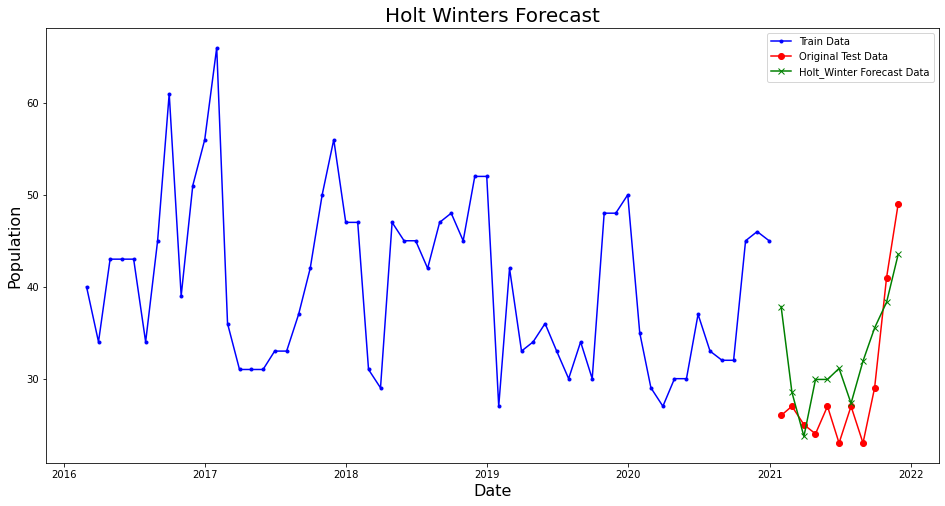

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing


holt_winter = ExponentialSmoothing(np.asarray(train_data['Popu']), seasonal_periods=12, trend='add', seasonal='add')

hw_fit = holt_winter.fit()

hw_forecast = hw_fit.forecast(len(test_data))

plt.figure(figsize=(16,8))

plt.plot(train_data.index, train_data['Popu'], "b.-", label='Train Data')
plt.plot(test_data.index, test_data['Popu'], "ro-", label='Original Test Data')
plt.plot(test_data.index, hw_forecast, "gx-", label='Holt_Winter Forecast Data')
plt.ylabel('Population', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')
plt.title('Holt Winters Forecast', fontsize=20)
plt.show()

In [79]:
list(hw_forecast)

[37.84782344015639,
 28.517392495450032,
 23.717367939847115,
 29.917495979641245,
 29.917328171135082,
 31.117350544491572,
 27.317309371007152,
 31.917479244417795,
 35.51742396514341,
 38.317526138402,
 43.51729542351043]

In [80]:
test_data['Popu']

date
2021-01-31    26
2021-02-28    27
2021-03-31    25
2021-04-30    24
2021-05-31    27
2021-06-30    23
2021-07-31    27
2021-08-31    23
2021-09-30    29
2021-10-31    41
2021-11-30    49
Freq: M, Name: Popu, dtype: int64

In [81]:
hw_residuals = test_data['Popu'] - hw_forecast

In [82]:
print('Mean Absolute Percent Error:', round(np.mean(abs(hw_residuals/test_data.Popu)),2))

Mean Absolute Percent Error: 0.19


In [44]:
print('Root Mean Squared Error:', np.sqrt(np.mean(hw_residuals**2)))

Root Mean Squared Error: 6.128118051539288


In [ ]:
from pmdarima import auto_arima

Sarimax_model = auto_arima(train_data.Popu,
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Sarimax_model.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

my_order = (0,1,0)

my_seasonal_order = (0, 1, 1, 12)

# define model
model = SARIMAX(train_data.Popu, order=my_order, seasonal_order=my_seasonal_order)

In [ ]:
#fit the model
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data.Popu))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data.Popu - predictions

In [ ]:
residuals

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
residuals.mean()

In [ ]:
predictions

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=16)

plt.title('Population Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

#for year in range(start_date.year,end_date.year):
 #   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.Popu)),3))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

In [ ]:
test_data.Popu

In [ ]:
predictions

In [ ]:
print(test_data.index)
train_data.shape

In [ ]:
rolling_predictions = []

for train_end in test_data.index:
    #print(train_end-timedelta(days=1))
    train_data1 = lim_data.Popu[:train_end-timedelta(days=1)]
    #print(len(train_data1))
    model = SARIMAX(train_data1, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions.append(pred[0])
    
rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)
rolling_predictions

In [ ]:
rolling_residuals = test_data.Popu - rolling_predictions
rolling_residuals

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Rolling Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
rolling_residuals.mean()

In [ ]:
   
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(rolling_predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Rolling Forecast'), fontsize=16)

plt.title('Population Rolling Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.Popu)),2))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

In [ ]:
ser=rolling_predictions
ser.to_numpy()

In [ ]:
pred_uc = ser.to_numpy().get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()